# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

The data is `census11sample.csv`. Download it from BlackBoard. You can also get it from <href = 'https://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv'>http://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv>. Read it into a DataFrame.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

## Divide the data (2 marks)

You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hythesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

## Explore the data (5 marks)

Explore dataset sample_explore. Measure descriptive statistics, plot histograms, scatterplots, and whatever. Find something interesting in the data, and generate a hypothesis about it. Remember, a hypothesis is a statement which is true or false, and can be falsefied.  

## State your hypothesis, and state the evidence that justifies it. (2 marks)

## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

## Perform the statistical test of the hypothesis. (5 marks)

You may do this using classical statistical methods, Bayesian methods, or, if you are uncomfortable with the notion that the data is normally distributed, you can use Monte Carlo (bootstrap) sampling. 

## Conclusions. (2 Marks) 

Write out your conclusion completely, but in a single sentence. E.g. "Using the method of XXX, I find that the null hypothesis is/cannot be ruled out at Y percent level." 

# Lab 4:

## Get the data (1 mark)

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
import scipy.stats as stats

In [430]:
df = pd.read_csv("census11sample.csv")
df.head(10)

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19
5,5,27,26,66,70,33,41,38,78,63
6,6,42,44,49,59,40,65,13,8,52
7,7,62,44,41,76,8,74,54,40,72
8,8,34,17,33,71,45,73,1,77,75
9,9,15,46,37,3,13,41,19,47,69


In [413]:
# making sure that we don't have any null values in the dataset.
# the .count() method will tell us how many non-null values we have in the dataset.
# our aim is to have 1000 for each column.
df.count()

Unnamed: 0                  1000
North East                  1000
North West                  1000
Yorkshire and The Humber    1000
East Midlands               1000
West Midlands               1000
East of England             1000
London                      1000
South East                  1000
South West                  1000
dtype: int64

In [414]:
# Drop the 'Unnamed: 0' column, which seems to be an index column
df.drop('Unnamed: 0', axis=1, inplace=True)
# Rename the index column to 'Index'
df = df.rename_axis('Individual ages')
df.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Individual ages,,,,,,,,,
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19


## Divide the data (2 marks)

Using the train_test_split function from the sklearn.model_selection package to split our data into a sample_explore for data exploration and sample_test for hypothesis testing. We will perform a 80/20 data split with the sample_explore data representing 80% of the parent(original) dataset.

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
sample_explore, sample_test = train_test_split(df, test_size = 0.3)

In [417]:
sample_explore.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Individual ages,,,,,,,,,
447,33,58,30,27,42,0,53,22,1
143,76,50,26,61,46,14,10,15,49
339,4,36,59,59,78,30,41,20,35
271,57,44,19,22,34,14,14,9,29
872,49,60,15,35,68,52,16,71,72


In [418]:
sample_test.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Individual ages,,,,,,,,,
386,19,26,27,38,68,21,52,11,15
988,24,11,59,15,2,33,81,89,13
605,26,0,47,66,10,29,63,6,6
928,60,32,42,52,77,9,57,0,5
26,60,44,42,75,29,48,34,14,58


## Explore the data (5 marks)

In [419]:
sample_explore.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,40.037143,37.731429,37.620000,39.265714,39.842857,41.681429,35.870000,39.852857,42.977143
std,23.572098,23.463163,23.116453,23.756110,23.361093,24.008819,22.160398,22.523040,24.574014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.750000,18.000000,18.000000,19.000000,20.000000,21.750000,18.000000,21.000000,22.000000
50%,41.000000,37.000000,37.000000,38.000000,40.000000,41.000000,34.000000,40.000000,44.000000
75%,58.000000,56.000000,54.000000,58.000000,58.000000,61.000000,51.000000,58.000000,61.000000
max,94.000000,99.000000,100.000000,95.000000,96.000000,97.000000,96.000000,95.000000,97.000000


Exploring the descriptive statistics, we realise that there is no significant diffence between the population mean of the North East and the West Midlands.

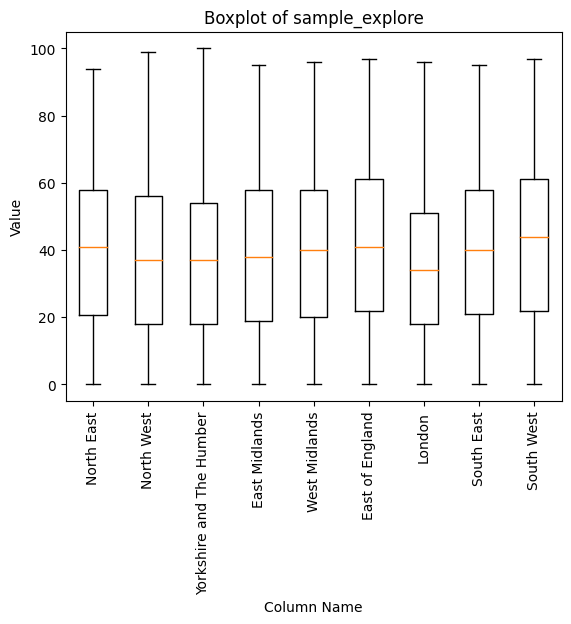

In [420]:
fig, ax = plt.subplots()
ax.boxplot(sample_explore)
ax.set_title("Boxplot of sample_explore")
ax.set_xticklabels(sample_explore.columns, rotation=90)
ax.set_xlabel('Column Name')
ax.set_ylabel('Value')
plt.show()

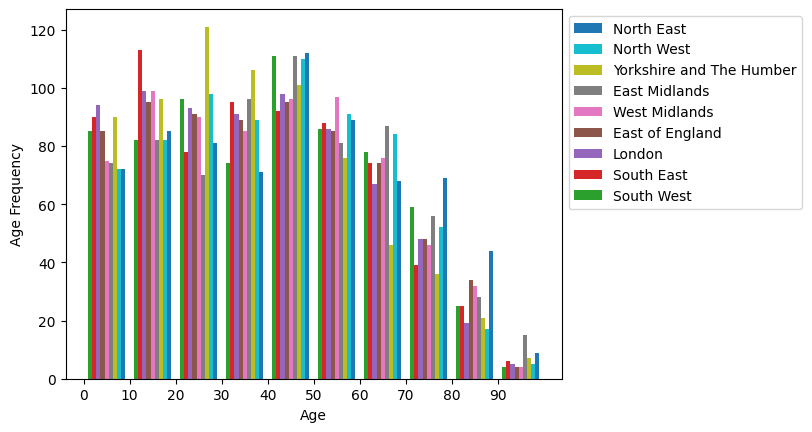

In [421]:
fig, ax = plt.subplots()
for region_name, region_data in sample_explore.items():
    ax.hist(sample_explore, bins=10, label=region_name)
ax.set_xticks(np.arange(0, 100, 10))
ax.set_xlabel("Age")
ax.set_ylabel("Age Frequency")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

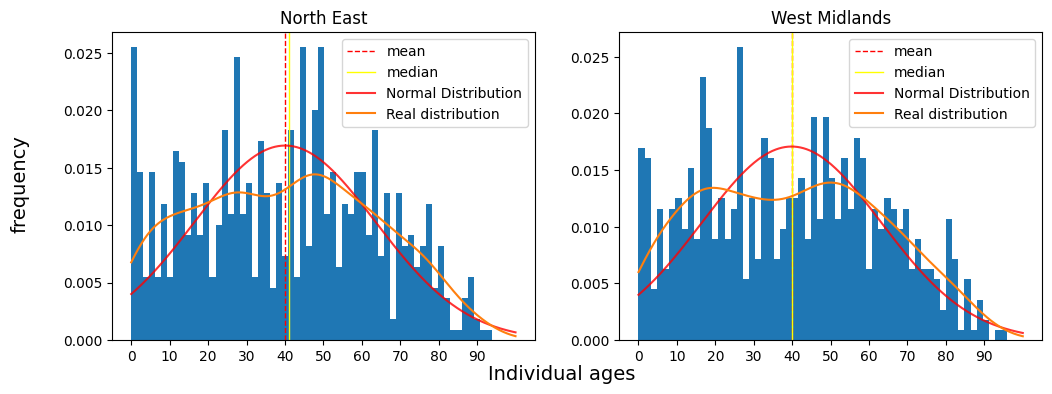

In [428]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

regions = ["North East", "West Midlands"]

for i, region in enumerate(regions):
    counts, bins, patches = ax[i].hist(sample_explore[region], bins=60, density=True)
    ax[i].set_title(region)
    ax[i].axvline(x=sample_explore[region].mean(), color='red', linestyle='dashed', linewidth=1, label = 'mean')
    ax[i].axvline(x=sample_explore[region].median(), color='yellow', linestyle='-', linewidth=1, label = 'median')
    ax[i].set_xticks(np.arange(0, 100, 10))
    
    
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    bin_widths = bins[1:] - bins[:-1]
    bin_areas = bin_widths * counts
    total_area = np.sum(bin_areas)
    norm_counts = counts / total_area
    ax[i].bar(bin_centers, norm_counts, width=bin_widths, alpha=0.5)
    
    # Plot normal distribution
    mean = sample_explore[region].mean()
    std = sample_explore[region].std()
    x = np.linspace(0, 100, 1000)
    y = norm.pdf(x, mean, std)
    ax[i].plot(x, y, 'r', alpha=0.8, label = 'Normal Distribution')
    
    kde = stats.gaussian_kde(sample_explore[region])
    y2 = kde(x)
    ax[i].plot(x, y2, label = 'Real distribution')
    ax[i].legend()
    
    

fig.text(0.5, 0.01, 'Individual ages', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'frequency', va='center', rotation='vertical', fontsize=14)
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

After exploring the Histogram of the two regions, we realise that they have a similar real distibution as well as a very similar mean and median values.

checking for normality using a QQ plot.


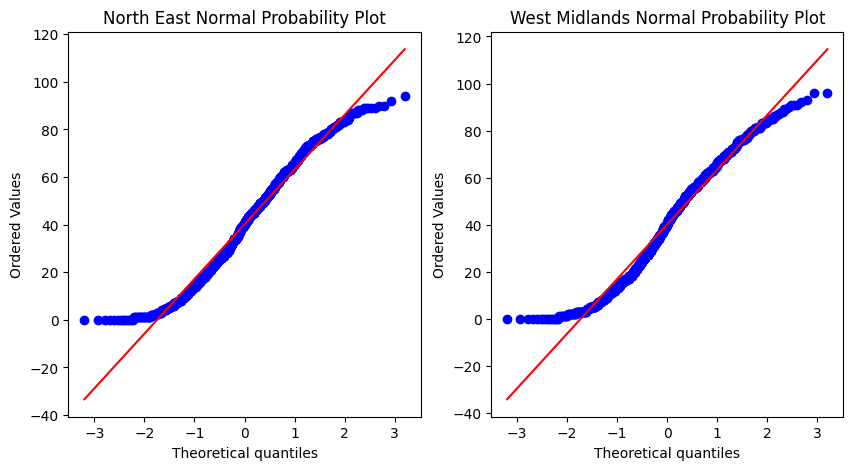

In [423]:
fig, ax = plt. subplots(1, 2, figsize=(10, 5))
stats.probplot(df['North East'], plot=ax[0])
stats.probplot(df[ 'West Midlands' ], plot=ax[1])
ax[0].set_title('North East Normal Probability Plot')
ax[1].set_title ('West Midlands Normal Probability Plot')
plt.show()

## State your hypothesis, and state the evidence that justifies it. (2 marks)

Null Hypothesis (H0): The mean age of West Midlands and North East is equal.

Alternative Hypothesis (H1): The mean age of West Midlands and the North East is not equal.

Symbolically, we can represent these hypotheses as:

H0: μL = μNE

H1: μL ≠ μNE

We chose this hypothesis since during the exploration, we realised that the mean of North East(40.527143) and West Midlands(40.672857) are aproximately the same. Furthermore, the Histogram and the Scatter plots showed us that the distribution, mean and standard deviation of the two regions is very similar.

## Plan the test. (3 marks)

In order to test our hypothesis, we plan to conduct a t-test with a confidence level of 95% and an alpha level of 5%. To conduct our test, we may assume that the random variables derived from the distribution are independent and identically distribued. Firstly, we will compare the p-value with the alpha level. if p > alpha, we accept H0, however, if p < alpha, we will reject H0. Furthermore, we will conduct a two tailed test and compute the test statistical value and observe if it occurs in the accepting or rejecting regions of the distribution.

## Perform the statistical test of the hypothesis. (5 marks)

In [424]:
sample_test.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Individual ages,,,,,,,,,
386,19,26,27,38,68,21,52,11,15
988,24,11,59,15,2,33,81,89,13
605,26,0,47,66,10,29,63,6,6
928,60,32,42,52,77,9,57,0,5
26,60,44,42,75,29,48,34,14,58


In [425]:
sample_test.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.483333,42.223333,41.96000,38.973333,40.970000,40.800000,36.033333,40.403333,44.173333
std,22.444947,22.653419,22.52843,22.820353,23.973141,22.401027,22.280491,24.554369,24.010239
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,24.000000,23.75000,19.750000,20.000000,24.000000,19.750000,20.000000,24.750000
50%,39.000000,44.000000,42.00000,38.000000,43.000000,41.000000,35.000000,41.000000,43.000000
75%,58.000000,59.000000,60.00000,58.250000,60.000000,58.000000,52.000000,60.000000,62.000000
max,89.000000,94.000000,94.00000,87.000000,96.000000,94.000000,92.000000,92.000000,98.000000


In [426]:
from scipy import stats

# Given values
x1 = sample_test['West Midlands'].mean()
x2 = sample_test['North East'].mean()
std1 = sample_test['West Midlands'].std()
std2 = sample_test['North East'].std()
n1 = sample_test['West Midlands'].count()
n2 = sample_test['North East'].count()
alpha = 0.05

t = (x1 - x2) / (np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2))


df = n1 + n2 - 2


p = 2 * (1 - stats.t.sf(abs(t), df))

print("Given Values: ")
print(" μ(London): " + str(x1))
print(" μ(North East): " + str(x2))
print(" STD(London): " + str(std1))
print(" STD(North East): " + str(std2))
print(" n(London): " + str(n1))
print(" n(North East): " + str(n2))
print("")
print("degree of freedom: " + str(df))
print("alpha " + str(alpha))
print("p-value: " + str(p))
print("t-test: " + str(t))

print("")
if p < alpha:
    print(str(p) + " < " + str(alpha))
    print("Reject null hypothesis. There is significant difference.")
else:
    print('p-value' + " > " + 'alpha')
    print(str(p) + " > " + str(alpha))
    print("Accept null hyphothesis, there is no significant difference")

    


Given Values: 
 μ(London): 40.97
 μ(North East): 40.483333333333334
 STD(London): 23.973140628042593
 STD(North East): 22.44494689291202
 n(London): 300
 n(North East): 300

degree of freedom: 598
alpha 0.05
p-value: 1.2024825833817654
t-test: 0.25667569610011326

p-value > alpha
1.2024825833817654 > 0.05
Accept null hyphothesis, there is no significant difference


p-value: 1.2024825833817654
degree of freedom: 598
critical value: 1.9639388980554935
t-test: 0.25667569610011326


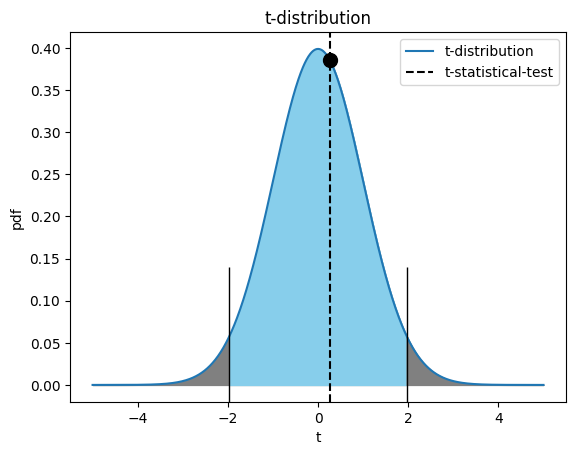

In [429]:
from scipy import stats

x1 = sample_test['West Midlands'].mean()
x2 = sample_test['North East'].mean()
std1 = sample_test['West Midlands'].std()
std2 = sample_test['North East'].std()
n1 = sample_test['West Midlands'].count()
n2 = sample_test['North East'].count()
alpha = 0.05

t = (x1 - x2) / (np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2))


df = n1 + n2 - 2


p = 2 * (1 - stats.t.sf(abs(t), df))

t_critical = stats.t.ppf(1-alpha/2, df)
print("p-value: " + str(p))
print("degree of freedom: " + str(df))
print("critical value: " + str(t_critical))





x = np.linspace(-5,5,1000)
y = stats.t.pdf(x, df)
plt.plot(x, y, label='t-distribution')

plt.fill_between(x[x <= t_critical], 0, stats.t.pdf(x[x <= t_critical], df), color='grey')
plt.fill_between(x[(x > -t_critical) & (x < t_critical)], 0, stats.t.pdf(x[(x > -t_critical) & (x < t_critical)], df), color='#87CEEB')
plt.fill_between(x[x >= t_critical], 0, stats.t.pdf(x[x >= t_critical], df), color='grey')
plt.plot(t_critical, stats.t.pdf(t_critical, df), marker='|', markersize=100, color='black')
plt.plot(-t_critical, stats.t.pdf(-t_critical, df), marker='|', markersize=100, color='black')



plt.xlabel('t')
plt.ylabel('pdf')
plt.title('t-distribution')


plt.plot(t, stats.t.pdf(t, df), marker='o', markersize=10, color='black')
plt.axvline(t, color = 'black', linestyle = '--', label = 't-statistical-test')
plt.legend()
print( "t-test: " + str(t))
plt.show() 



## Conclusions. (2 Marks) 

After performing the t-test, we obtained a p-value less than the alpha level of 0.05, which gives us a strong evidence of accepting the null hypothesis. In addition, after exploring the probability density function of the t-distribution. we found that the calculated t-statistical-test value is located in the accepting region. Therefore, with a 95% confidence level, we fail to reject the null hypothesis H0 in favour of the alternative hypothesis H1.